<a href="https://colab.research.google.com/github/menaxyz/Feedforward-Neural-Network/blob/main/Feedforward_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the cell below, generate training data for your model.
In the interval of x1: +-10, x2: +-10, generate 1000 data for x1 and 1000 data for x2.
All data need to be separated by the same distance.


That is, you need to generate one value for y for every 0.02 differences in x1 or x2,
and have a total of 1000000 data in your training dataset.

In [1]:
import numpy as np


x1_interval = 10
x2_interval = 10
step_size = 0.02
num_points = int(x1_interval / step_size)


x1_values = np.linspace(-x1_interval, x1_interval, num_points)
x2_values = np.linspace(-x2_interval, x2_interval, num_points)

x1, x2 = np.meshgrid(x1_values, x2_values)

x1_flat = x1.flatten()
x2_flat = x2.flatten()

y_values = np.sin(x1_flat) + np.cos(x2_flat)

print("Shape of x1:", x1_flat.shape)
print("Shape of x2:", x2_flat.shape)
print("Shape of y:", y_values.shape)




Shape of x1: (250000,)
Shape of x2: (250000,)
Shape of y: (250000,)


In the cells below, build your models and train it with data from part1.
You need to split your training data to two parts. With 40% used in training, and 60% used in test.


You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [2]:
#train_test_split model 1
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



X = np.column_stack((x1_flat, x2_flat))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.6, random_state=42)

# Build nn model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')

#train
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.4)

#evaluate loss
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0217 - val_loss: 0.9147
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8930 - val_loss: 0.8855
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8706 - val_loss: 0.8634
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8494 - val_loss: 0.8500
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8294 - val_loss: 0.8209
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8133 - val_loss: 0.8064
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7951 - val_loss: 0.7818
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7539 - val_loss: 0.7401
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7081 - val_loss: 0.6978
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.673

In [4]:
#model 2 tanh
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.column_stack((x1_flat, x2_flat))

X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.6, random_state=42)


model = Sequential()
model.add(Dense(32, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.4)


loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9119 - val_loss: 0.8331
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7585 - val_loss: 0.7132
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6777 - val_loss: 0.6510
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6193 - val_loss: 0.5952
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5648 - val_loss: 0.5363
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5000 - val_loss: 0.4677
Epoch 7/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4346 - val_loss: 0.4067
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3779 - val_loss: 0.3532
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3293 - val_loss: 0.3060
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.291

In [5]:
#model 3 Leaky ReLU
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

X = np.column_stack((x1_flat, x2_flat))


X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.6, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=2))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.4)


loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9245 - val_loss: 0.8930
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8772 - val_loss: 0.8667
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8483 - val_loss: 0.8366
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8163 - val_loss: 0.8091
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7894 - val_loss: 0.7767
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7569 - val_loss: 0.7465
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7243 - val_loss: 0.7147
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6998 - val_loss: 0.6984
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6787 - val_loss: 0.6759
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.663

3125/3125 [==============================] - 5s 2ms/step - loss: 0.0231
Training Loss: 0.023144440725445747
4688/4688 [==============================] - 8s 2ms/step - loss: 0.0231
Test Loss: 0.023063862696290016
7813/7813 [==============================] - 12s 2ms/step


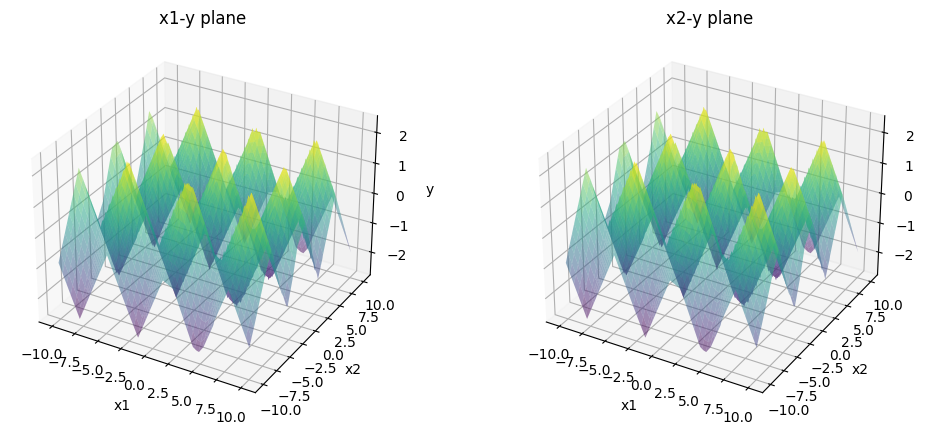

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


train_loss = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")

test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

x1_test_values = np.linspace(-x1_interval, x1_interval, num_points)
x2_test_values = np.linspace(-x2_interval, x2_interval, num_points)
x1_test, x2_test = np.meshgrid(x1_test_values, x2_test_values)
X_test_values = np.column_stack((x1_test.flatten(), x2_test.flatten()))
y_pred = model.predict(X_test_values).reshape(x1_test.shape)

fig = plt.figure(figsize=(12, 5))


ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1_test, x2_test, y_pred, alpha=0.5, cmap='viridis', label='Predicted')
ax1.set_title('x1-y plane')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')


ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x1_test, x2_test, y_pred, alpha=0.5, cmap='viridis', label='Predicted')
ax2.set_title('x2-y plane')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')

plt.show()


In [7]:
#model tanh


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X = np.column_stack((x1_flat, x2_flat))


X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.6, random_state=42)


model = Sequential()
model.add(Dense(32, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.4)


weights, biases = model.layers[0].get_weights()

# 5 random data points
random_indices = np.random.choice(len(X_train), size=5, replace=False)
selected_data = X_train[random_indices]

manual_outputs = np.tanh(np.dot(selected_data, weights) + biases)

model_outputs = model.predict(selected_data)

for i in range(5):
    print(f"\nSample {i + 1}:")
    print("Manual Calculation Output:", manual_outputs[i][0])
    print("Model Prediction Output:", model_outputs[i][0])


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9055 - val_loss: 0.7957
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7340 - val_loss: 0.6937
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6583 - val_loss: 0.6291
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5998 - val_loss: 0.5742
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5481 - val_loss: 0.5257
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5052 - val_loss: 0.4929
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4758 - val_loss: 0.4778
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4566 - val_loss: 0.4498
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4434 - val_loss: 0.4334
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.427